In [244]:
import torch as t
import matplotlib.pyplot as plt

In [310]:
N = 10 + 1
extra = 63
time = t.linspace(0,10,N + (N-1)*extra)
ti = time[::extra+1]

rs = (t.rand(2) - 0.5)*2
def _h(time):
    return t.sin(time)**2*time + rs[0]*t.cos(time + rs[1])
hi = _h(ti)

In [311]:
dt = t.mean(ti[1:] - ti[:-1])
p = 0.2

def f1(times):
    scaling = t.log(t.tensor(1/p))/dt**2
    return t.exp(-times**2*scaling)

def f2(times):
    scaling = (1/p - 1)/dt**2
    return 1/(1+times**2*scaling)

# def f2(times):
#     scaling = p**2 + dt**2
#     return t.sqrt(scaling-times**2).nan_to_num(0)

ts = time

dts = ts.view(-1,1) - ti.view(1,-1)
w1 = f1(dts)
scale = w1[0].sum()
w1 /= w1.sum(1,keepdim=True)

# w2 = f2(dts)
# w2 /= w2.sum(1,keepdim=True)

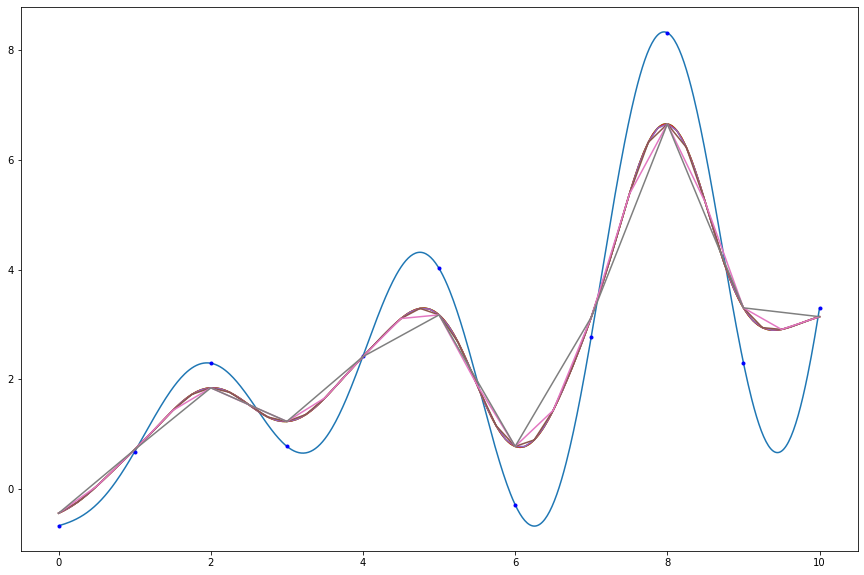

In [320]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(time,_h(time))
ax.plot(ti,hi,'b.')
for i in [1,2,4,8,16,32,64]:
    ts = time[::i]

    dts = ts.view(-1,1) - ti.view(1,-1)
    w1 = f1(dts)
    w1 /= w1.sum(1,keepdim=True)
    ax.plot(ts,w1@hi)


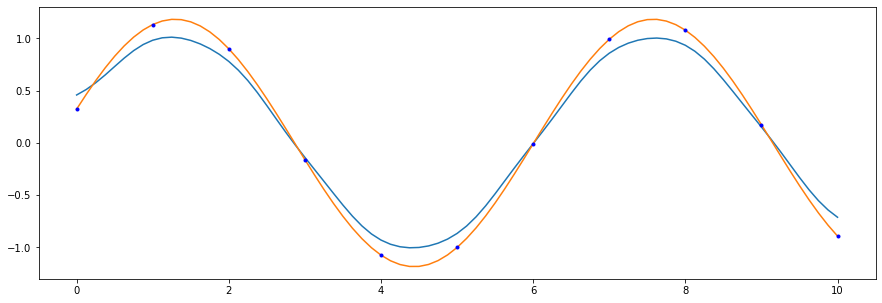

In [302]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ts,w1@hi)
# ax.plot(ts,w2@hi)
ax.plot(ts,_h(ts))
ax.plot(ti,hi,'b.')

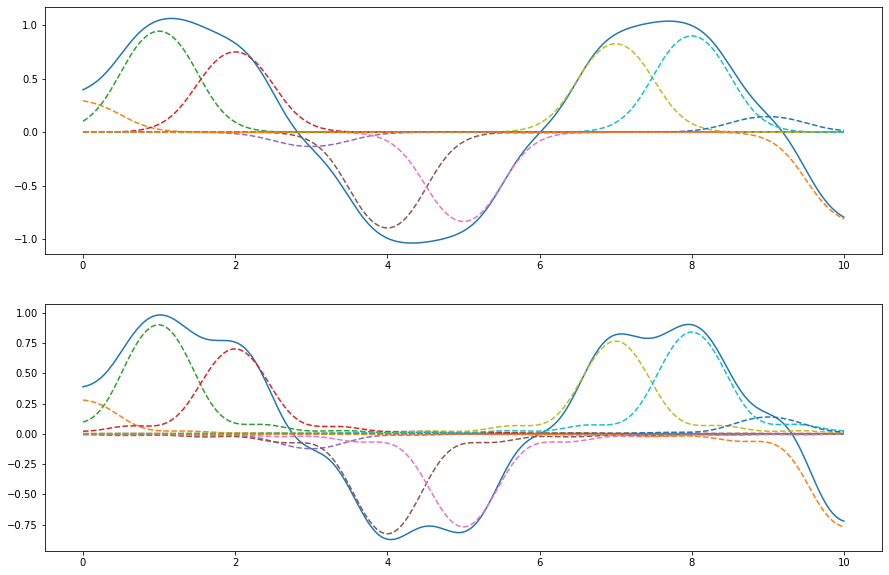

In [257]:
fig, ax = plt.subplots(figsize=(15,10),nrows=2)

ax[0].plot(time,w1@hi)
ax[0].plot(time,w1*hi,linestyle='--');

ax[1].plot(time,w2@hi)
ax[1].plot(time,w2*hi,linestyle='--');

# ax[0].plot(ti,w1@hi)
# ax[0].plot(ti,w1*hi,linestyle='--');

# ax[1].plot(ti,w2@hi)
# ax[1].plot(ti,w2*hi,linestyle='--');

In [ ]:
def constrain(diff):
    max_diff = 0.005
    return obj.restrict_output(diff,0,max_diff) + obj.restrict_output(diff,-max_diff,0)-max_diff

# def restrict_diff(heights):
#     diff = heights[1:] - heights[:-1]
#     constrained = constrain(diff)
#     return t.concat([heights[[0]],constrained])

def restrict_diff(heights):
    out = t.zeros(heights.shape[0])
    out[0] = heights[0]
    for i in range(heights.shape[0]-1):
        diff = heights[i+1] - out[i]
        out[i+1] = out[i] + constrain(diff)
    return out

fig, ax = plt.subplots(figsize=(15,5))
x = t.linspace(0,30,1000)

rand = good#t.rand((15,1))*4
# good = rand.clone()
def f(x):
    return t.sin(rand*x).mean(0)*0.1

# tmp = t.cumsum(restrict_diff(f(x)),0)
ax.plot(x,f(x))
ax.plot(x,restrict_diff(f(x)),'b.')
ax.set_xlim(-0.01,1)